In [1]:
import numpy as np # conda install numpy
import tensorflow as tf

In [2]:
# y_pred = W*X + b
W = tf.Variable(0.0)
b = tf.Variable(0.0)

def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

def predict(X):
    return W * X + b
#     return W @ X + b

def train(X, y, epochs=40, lr=0.0001):
    current_loss=0
    for epoch in range(epochs):
        with tf.GradientTape() as t:
            t.watch(tf.constant(X))
            current_loss = loss(y, predict(X))

        dW, db = t.gradient(current_loss, [W, b])
        W.assign_sub(lr * dW) # W -= lr * dW
        b.assign_sub(lr * db)

        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') # <3 eager execution
        print(f'    W: {W.numpy()}, b: {b.numpy()}')


In [3]:
# ``[low, high)`` (includes low, but excludes high)
np.random.uniform?

In [4]:
# Dataset 1
# random linear data: 100 between 0-50 i.e. [0, 50]
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
# print(X)

# Adding noise to the random linear data
np.random.seed(1234)
X += np.random.uniform(-10, 10, n)
y += np.random.uniform(-10, 10, n) 
X

array([-6.16961099,  2.94722593, -0.23534421,  7.22232319,  7.61971818,
       -2.02289537, -1.44041187,  9.57279709, 13.20319111, 12.06410724,
        2.20685045,  5.57545807,  9.72986476, 10.81969711,  4.47572217,
        8.7996813 ,  8.14247139, -1.13877242, 14.54744152, 17.24878341,
        7.39872978, 12.91398417,  2.61873594,  8.99264174, 20.78401416,
       15.65382549, 11.07536469, 19.4109665 , 10.47813658, 16.0084377 ,
       22.53406294, 14.38003413, 22.204569  ,  9.54200316, 21.25693659,
       21.76839384, 12.5576603 , 27.18422126, 18.0347343 , 27.88328888,
       11.39820466, 14.39281238, 12.15922679, 25.21479059, 24.11471782,
       23.39347599, 14.09880449, 24.96603534, 20.83579315, 24.80681141,
       17.4904116 , 27.90144988, 27.58151912, 16.90295801, 29.62156145,
       36.02023551, 34.09331094, 38.62950811, 38.46896454, 35.6372625 ,
       26.0080495 , 33.30641491, 30.87500723, 25.73168539, 29.96958136,
       23.90575653, 32.3663015 , 43.47847867, 26.82228835, 27.23

In [10]:
# Dataset 2
from sklearn.datasets import make_regression
# X, y = make_regression(n_samples=100, n_features=1, noise = 0.8, bias = 2,  n_targets=1)
X, y = make_regression(n_samples=100, n_features=1, noise = 5, bias = 2, random_state=100)
print(X)
X = X.reshape(-1)
X

[[-0.37690335]
 [-1.1994512 ]
 [-1.74976547]
 [ 0.98132079]
 [-1.70595201]
 [ 0.00301743]
 [ 0.02828363]
 [ 1.24946974]
 [-1.6355294 ]
 [-0.58359505]
 [-0.18949583]
 [ 0.7788224 ]
 [ 0.05567601]
 [ 0.23784462]
 [ 0.67272081]
 [ 0.00731456]
 [-0.54974619]
 [-0.45802699]
 [ 0.51421884]
 [ 0.75044476]
 [-1.43219061]
 [-0.10441114]
 [ 0.73620521]
 [-0.57882582]
 [-0.25187914]
 [ 0.25500144]
 [-0.18501411]
 [ 0.43516349]
 [ 0.10886347]
 [ 0.68689007]
 [ 0.18451869]
 [ 1.36155613]
 [-1.73309562]
 [-0.88973148]
 [-1.23243451]
 [ 0.35750775]
 [-0.82793236]
 [-0.54443916]
 [-0.84243574]
 [ 0.61303888]
 [-0.68921798]
 [ 1.61898166]
 [-0.75635231]
 [-1.04420988]
 [-0.53128038]
 [-0.07602347]
 [ 0.00395759]
 [ 0.81684707]
 [ 1.54160517]
 [ 0.3426804 ]
 [-1.6135785 ]
 [ 1.02692144]
 [ 0.90497412]
 [-1.07004333]
 [-1.56668753]
 [-1.69061683]
 [ 1.18962227]
 [-1.8411883 ]
 [ 1.29974807]
 [-1.35639905]
 [ 2.03460756]
 [ 0.22239961]
 [-0.61293874]
 [-0.33177714]
 [ 0.81645401]
 [ 1.02973269]
 [-0.55071

array([-0.37690335, -1.1994512 , -1.74976547,  0.98132079, -1.70595201,
        0.00301743,  0.02828363,  1.24946974, -1.6355294 , -0.58359505,
       -0.18949583,  0.7788224 ,  0.05567601,  0.23784462,  0.67272081,
        0.00731456, -0.54974619, -0.45802699,  0.51421884,  0.75044476,
       -1.43219061, -0.10441114,  0.73620521, -0.57882582, -0.25187914,
        0.25500144, -0.18501411,  0.43516349,  0.10886347,  0.68689007,
        0.18451869,  1.36155613, -1.73309562, -0.88973148, -1.23243451,
        0.35750775, -0.82793236, -0.54443916, -0.84243574,  0.61303888,
       -0.68921798,  1.61898166, -0.75635231, -1.04420988, -0.53128038,
       -0.07602347,  0.00395759,  0.81684707,  1.54160517,  0.3426804 ,
       -1.6135785 ,  1.02692144,  0.90497412, -1.07004333, -1.56668753,
       -1.69061683,  1.18962227, -1.8411883 ,  1.29974807, -1.35639905,
        2.03460756,  0.22239961, -0.61293874, -0.33177714,  0.81645401,
        1.02973269, -0.55071441, -1.10452309, -0.86222735,  0.93

In [11]:
X

array([-0.37690335, -1.1994512 , -1.74976547,  0.98132079, -1.70595201,
        0.00301743,  0.02828363,  1.24946974, -1.6355294 , -0.58359505,
       -0.18949583,  0.7788224 ,  0.05567601,  0.23784462,  0.67272081,
        0.00731456, -0.54974619, -0.45802699,  0.51421884,  0.75044476,
       -1.43219061, -0.10441114,  0.73620521, -0.57882582, -0.25187914,
        0.25500144, -0.18501411,  0.43516349,  0.10886347,  0.68689007,
        0.18451869,  1.36155613, -1.73309562, -0.88973148, -1.23243451,
        0.35750775, -0.82793236, -0.54443916, -0.84243574,  0.61303888,
       -0.68921798,  1.61898166, -0.75635231, -1.04420988, -0.53128038,
       -0.07602347,  0.00395759,  0.81684707,  1.54160517,  0.3426804 ,
       -1.6135785 ,  1.02692144,  0.90497412, -1.07004333, -1.56668753,
       -1.69061683,  1.18962227, -1.8411883 ,  1.29974807, -1.35639905,
        2.03460756,  0.22239961, -0.61293874, -0.33177714,  0.81645401,
        1.02973269, -0.55071441, -1.10452309, -0.86222735,  0.93

In [12]:
y

array([  -5.34488323,  -50.74187103,  -68.44779124,   42.10753759,
        -65.80969069,    3.0302495 ,    6.40028314,   61.04410781,
        -66.88792069,  -27.5610086 ,   -4.12002756,   28.49865186,
         10.78778256,   14.74335017,   37.54662905,   -1.89629434,
        -17.03885849,  -22.75045621,   22.42477835,   31.58007832,
        -54.6480521 ,  -10.16442676,   41.42542365,  -18.29909517,
        -13.40049012,   22.65789158,    2.82577906,   21.17610467,
         -1.38728198,   18.32689486,    6.92289817,   59.34845621,
        -62.05756995,  -33.46603003,  -49.38997688,   19.25499454,
        -27.45749595,  -21.52183437,  -35.15641358,   19.71449822,
        -30.13714176,   57.14701928,  -31.60072892,  -35.54553316,
        -19.9562148 ,    1.64759957,    0.39678219,   32.70346961,
         59.92142642,    4.70179449,  -64.37288503,   47.85613116,
         38.33575376,  -49.30282808,  -60.43222399,  -59.8703855 ,
         50.30023639,  -74.12692234,   53.92786526,  -54.89836

In [13]:
# reset W,b
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# train(X, y)
# train(X, y, epochs=100, lr=0.00005) # Dataset 1: X數值較大，因此lr不能太大!
train(X, y, epochs=100, lr=0.5) # Dataset 2 X數值較小，因此lr要調大!

W.numpy(), b.numpy()

Epoch 0: Loss: 1575.8043212890625
    W: 38.29822540283203, b: -2.3598251342773438
Epoch 1: Loss: 50.83574676513672
    W: 39.91866683959961, b: 1.629542350769043
Epoch 2: Loss: 30.82013702392578
    W: 40.413185119628906, b: 1.7983372211456299
Epoch 3: Loss: 30.51778793334961
    W: 40.45486831665039, b: 1.8498492240905762
Epoch 4: Loss: 30.512866973876953
    W: 40.46226501464844, b: 1.8541914224624634
Epoch 5: Loss: 30.512781143188477
    W: 40.463077545166016, b: 1.8549615144729614
Epoch 6: Loss: 30.512781143188477
    W: 40.46319580078125, b: 1.8550457954406738
Epoch 7: Loss: 30.512779235839844
    W: 40.46321105957031, b: 1.8550585508346558
Epoch 8: Loss: 30.512781143188477
    W: 40.46321105957031, b: 1.8550608158111572
Epoch 9: Loss: 30.512781143188477
    W: 40.46321487426758, b: 1.8550599813461304
Epoch 10: Loss: 30.512781143188477
    W: 40.46321105957031, b: 1.8550608158111572
Epoch 11: Loss: 30.512781143188477
    W: 40.46321487426758, b: 1.8550599813461304
Epoch 12: Loss:

(40.463215, 1.85506)

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>


30.512779297311702

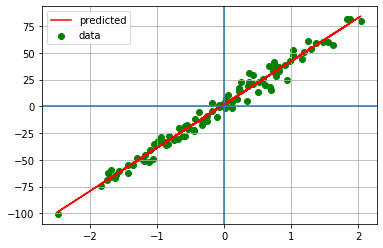

In [14]:
import matplotlib.pyplot as plt 

y_pre = predict(X)
print(type(y_pre))
y_pre = y_pre.numpy()
print(type(y_pre))

plt.scatter(X, y, label='data', c = 'g')
plt.plot(X, y_pre, 'r-', label='predicted')
plt.legend(loc = 'upper left')
plt.axvline()
plt.axhline()
plt.grid()

MSE =  np.mean((y_pre - y) ** 2)
MSE